# Exploring Liver Disease with Machine Learning


# I) Lets look out the Data

In [ ]:
# Import the data processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:

df_liver = pd.read_csv('indian_liver_patient.csv')

In [ ]:
# Access the first 5 rows of df_liver
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# II) Cleaning the data


# a) Dealing with missing values

In [ ]:
# Define a function that allows us to create a table of missing values in df_liver and their percentages in 
# descending order
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [ ]:
# Find the total count and % of missing values 
missing_values(df_liver)

,Total,%
Albumin_and_Globulin_Ratio,4,1.0
Age,0,0.0
Gender,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0


In [ ]:
# Replace missing values with the mean of feature column Albumin_and_Globulin_Ratio, 
# then check to see that it has been successfull, where the sum of missig values should be 0
df_liver['Albumin_and_Globulin_Ratio'].fillna(df_liver['Albumin_and_Globulin_Ratio'].mean(), inplace = True)
df_liver['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [ ]:
# Repeat to see what is the % of missing values
missing_values(df_liver)

,Total,%
Age,0,0.0
Gender,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0
Albumin_and_Globulin_Ratio,0,0.0


# b) Exploring the data visually

In [ ]:

df_liver.corr().style.background_gradient(cmap='coolwarm')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


The above correlation heatmap demonstrates strong positive (closer to 1) and negative correlations (closer to -1) but also weak positive and negative correlations (closer to zero). 



Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)


In [ ]:
# Change the current categorical feature Gender to a numerical feature of 0 or 1 

df_liver['Gender'] = df_liver['Gender'].apply(lambda x:1 if x == 'Male' else 0)
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<ipython-input-10-e5d15519d40e>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Gender", y="Dataset", data=df_liver_Gender, ci=None)


(0.0, 700.0)

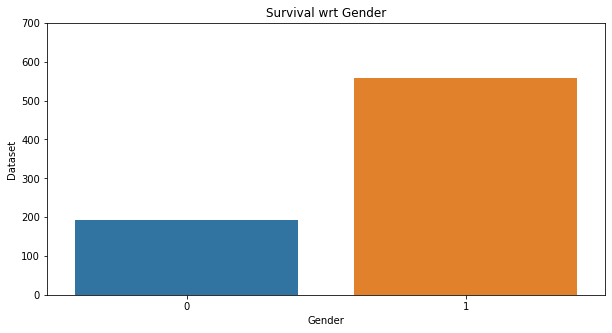

In [ ]:
# Create a table for Dataset (with and without liver disease) and gender
df_liver_Gender = round(df_liver[['Gender', 'Dataset']].groupby(['Gender'], as_index=False).agg(np.sum), 3)

# Generate plot to determine the effect of gender on the dataset 
plt.figure(figsize=(10,5))

sns.barplot(x="Gender", y="Dataset", data=df_liver_Gender, ci=None)
plt.title("Survival wrt Gender")
plt.ylim(0, 700)

It appears from these plots that men normally have high liver function test results and hence are likely to have liver disease. This is likely because culturally men in NE of Andhra Pradesh in India consume alchohol more than women. Let us now look a dsitribution plot for all the liver function tests in relation to the target feature and gender.

#  Applying machine learning approaches to liver disease

I will employ the following supervised  machine learning models, whilst evaluating the mean accuracy of each of them by a stratified kfold cross validation procedure.


In [ ]:
# Machine learning libraries in sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:

K_fold = StratifiedKFold(n_splits=10)

In [ ]:
# Separate train features and response
X = df_liver.drop(["Dataset"],axis = 1)
Y = df_liver["Dataset"]



# Scale the data
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

# Create the Train and Test sets
# Splitting the train and test into 70% training and 30% testing
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,stratify=Y, test_size=0.3,random_state=42)


# Find the shape of all sets
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((408, 10), (408,), (175, 10), (175,))

##### Logistic regression

Logistic regression models the probabilities for classification problems with two possible outcomes. Furthermore, this models is an extension of the linear regression model but for classification problems.

In [ ]:
# Logistic Regression
model_logreg = LogisticRegression()
model_logreg.fit(X_train,Y_train)
y_pred = model_logreg.predict(X_test)

scores = cross_val_score(model_logreg, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_logreg = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_logreg))
acc_logreg = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_logreg))

[0.73170732 0.73170732 0.70731707 0.68292683 0.70731707 0.68292683
 0.70731707 0.73170732 0.725      0.725     ]
Score: 71.329
Accuracy: 72.0


##### KNeighborsClassifier

This is a  test that searches for the K nearest measurements of the training data and draws a Euclidean distance. It then votes based on that information of how to classify the data.

In [ ]:
# K-Neighbors 
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, Y_train)
y_pred = model_knn.predict(X_test)

scores = cross_val_score(model_knn, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_knn = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_knn))
acc_knn = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_knn))

[0.73170732 0.70731707 0.70731707 0.58536585 0.56097561 0.75609756
 0.63414634 0.70731707 0.725      0.6       ]
Score: 67.152
Accuracy: 65.143


##### Decision Tree Classifier

The data is continously split according to a certain parameter, in this case we are basing it on the features.

In [ ]:
# Decision Tree 
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)
y_pred = model_dtc.predict(X_test)

scores = cross_val_score(model_dtc, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_dtc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_dtc))
acc_dtc = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_dtc))

[0.68292683 0.68292683 0.70731707 0.70731707 0.68292683 0.53658537
 0.70731707 0.6097561  0.6        0.625     ]
Score: 65.421
Accuracy: 64.0


##### Random Forest Classifier

Random forest classifier creates decision trees on randomly selected data samples. The model obtains prediction from each tree and subsequently selects the best solution by means of voting. Furthermore, random forest classfier also provides a very good indicator of the feature importance.


In [ ]:
# Random Forest 
model_rfc = RandomForestClassifier(n_estimators=50)
model_rfc.fit(X_train, Y_train)
y_pred = model_rfc.predict(X_test)

scores = cross_val_score(model_rfc, X_train, Y_train, cv=K_fold, n_jobs=4, scoring ='accuracy')

print(scores)
score_rfc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_rfc))
acc_rfc = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_rfc))

[0.65853659 0.80487805 0.73170732 0.75609756 0.73170732 0.63414634
 0.82926829 0.68292683 0.7        0.7       ]
Score: 72.293
Accuracy: 69.714


##### Which is the best model?

In [ ]:
results = pd.DataFrame({'Model': ['Logistic Regression','KNeighbor', 
                                  'Decision Tree ', 'Random Forest ', 
                                  ],
                        'Accuracy': [acc_logreg, acc_knn,  acc_dtc, acc_rfc, 
                                  ], 
                        'Score': [score_logreg, score_knn, score_dtc, score_rfc,  
                              ],})
df_results = results.sort_values(by='Score', ascending=False)
df_results = df_results.set_index('Score')
df_results

,Model,Accuracy
Score,,
72.293,Random Forest,69.714
71.329,Logistic Regression,72.000
67.152,KNeighbor,65.143
65.421,Decision Tree,64.000
